<a href="https://colab.research.google.com/github/JosueBVN/Implementacion-JBVN-A01751694/blob/main/A01751694_modulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learnign con un archivo de fracturas de huesos

##**Introducción:**

El código proporcionado se centra en la aplicación de técnicas de aprendizaje profundo para analizar un conjunto de datos de fracturas óseas. Este tipo de análisis puede ser crucial en el campo médico, ya que la detección temprana y precisa de fracturas a partir de imágenes radiográficas puede mejorar significativamente la atención al paciente. El uso de redes neuronales convolucionales (CNN) permite al modelo aprender patrones complejos directamente de las imágenes, facilitando la identificación de fracturas.

Para acceder a la Dataset, esta es la [liga](https://www.kaggle.com/datasets/osamajalilhassan/bone-fracture-dataset) de Kaggle.

###**Sección 1:**

En esta sección, se importan las bibliotecas necesarias y se establecen las bases para construir el modelo de aprendizaje profundo. Se utilizan herramientas como TensorFlow y OpenCV para la manipulación de imágenes, así como funciones específicas para la construcción de la red neuronal.

In [5]:
from google.colab import drive
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


###**Sección 2:**

Aquí se monta el Google Drive para acceder a los conjuntos de datos almacenados en la nube. Se definen las rutas de los directorios que contienen las imágenes de entrenamiento y prueba, separando las imágenes de fracturas de huesos de aquellas sin fracturas.


In [6]:
# Montar Google Drive
drive.mount("/content/drive")
!pwd

# Definir las rutas
x_train_path = "/content/drive/MyDrive/Modulo2/BoneFractureDataset/training/fractured"
y_train_path = "/content/drive/MyDrive/Modulo2/BoneFractureDataset/training/not_fractured"
x_test_path = "/content/drive/MyDrive/Modulo2/BoneFractureDataset/testing/fractured"
y_test_path = "/content/drive/MyDrive/Modulo2/BoneFractureDataset/testing/not_fractured"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


###**Sección 3:**

Esta parte del código se encarga de cargar y redimensionar las imágenes. La función `load_and_resize_images` itera a través de los archivos en los directorios de entrenamiento y prueba, carga las imágenes utilizando OpenCV y las redimensiona a un tamaño específico (128x128 píxeles). Además, se crean etiquetas para indicar si la imagen contiene o no una fractura.


In [7]:
# Función para cargar y redimensionar imágenes
def load_and_resize_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img_resized = cv2.resize(img, (128, 128))
        images.append(img_resized)
    return np.array(images)

# Cargar y redimensionar imágenes de entrenamiento
x_train = load_and_resize_images(x_train_path)
y_train = load_and_resize_images(y_train_path)

# Cargar y redimensionar imágenes de prueba
x_test = load_and_resize_images(x_test_path)
y_test = load_and_resize_images(y_test_path)

# Crear etiquetas (1 para fractura, 0 para no fractura)
y_train_labels = np.ones(len(x_train))
y_test_labels = np.ones(len(x_test))

# Concatenar imágenes y etiquetas de entrenamiento y prueba
x_train = np.concatenate((x_train, y_train), axis=0)
y_train_labels = np.concatenate((y_train_labels, np.zeros(len(y_train))))

x_test = np.concatenate((x_test, y_test), axis=0)
y_test_labels = np.concatenate((y_test_labels, np.zeros(len(y_test))))

# Normalizar imágenes
x_train = x_train / 255.0
x_test = x_test / 255.0

# Realizar one-hot encoding en las etiquetas
y_train_one_hot = to_categorical(y_train_labels, num_classes=2)
y_test_one_hot = to_categorical(y_test_labels, num_classes=2)


###**Sección 4:**

Aquí se define la arquitectura del modelo de CNN. Se utiliza un modelo secuencial con capas convolucionales y de pooling para extraer características de las imágenes. La red se completa con capas completamente conectadas para realizar la clasificación final. El modelo se compila con una función de pérdida categórica cruzada y el optimizador Adam, y luego se entrena con los conjuntos de datos de entrenamiento.

Después del entrenamiento, el modelo se evalúa en el conjunto de prueba y se imprimen métricas como la pérdida y la precisión.

En resumen, este código realiza un análisis de fracturas óseas mediante el uso de técnicas de aprendizaje profundo, lo que podría tener aplicaciones valiosas en el diagnóstico médico.

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

# Crear modelo secuencial
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo y almacenar historial en 'history'
history = model.fit(x_train, y_train_one_hot, epochs=20, validation_data=(x_test, y_test_one_hot), callbacks=[EarlyStopping(patience=3)])

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test_one_hot)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Obtener historial de precisión y pérdida en entrenamiento y prueba
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear gráfico de precisión
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/20
277/277 [==============================] - 425s 2s/step - loss: 2.3991 - accuracy: 0.6852 - val_loss: 1.8076 - val_accuracy: 0.6567
Epoch 2/20
277/277 [==============================] - 414s 1s/step - loss: 1.1220 - accuracy: 0.7477 - val_loss: 1.2507 - val_accuracy: 0.6000
Epoch 3/20
277/277 [==============================] - 407s 1s/step - loss: 1.0081 - accuracy: 0.7941 - val_loss: 1.4501 - val_accuracy: 0.6100
Epoch 4/20
277/277 [==============================] - 408s 1s/step - loss: 0.9474 - accuracy: 0.8378 - val_loss: 1.7935 - val_accuracy: 0.5417
Epoch 5/20
174/277 [=================>............] - ETA: 2:27 - loss: 0.9293 - accuracy: 0.8763

### #**Nota:** el modelo se tarda 1 hora aproximadamente con TPU, considere su tiempo

#**Ejemplo de modelo**

Al agregar un código adicional al final, se proporciona una función llamada `predict_and_visualize`. Esta función utiliza el modelo entrenado para realizar predicciones sobre el conjunto de datos de prueba. Luego, visualiza algunas de estas predicciones junto con las imágenes correspondientes.

La función toma el modelo, las imágenes de prueba (`x_test`), y las etiquetas reales (`y_test_labels`). Utilizando `matplotlib`, muestra las primeras 10 imágenes de prueba con sus predicciones y etiquetas reales. Cada imagen se presenta con un título que indica la etiqueta predicha por el modelo y la etiqueta real.

Este código adicional facilita la verificación visual de las predicciones del modelo, permitiendo una evaluación rápida de su desempeño con ejemplos específicos del conjunto de prueba.

19/19 [==============================] - 6s 336ms/step


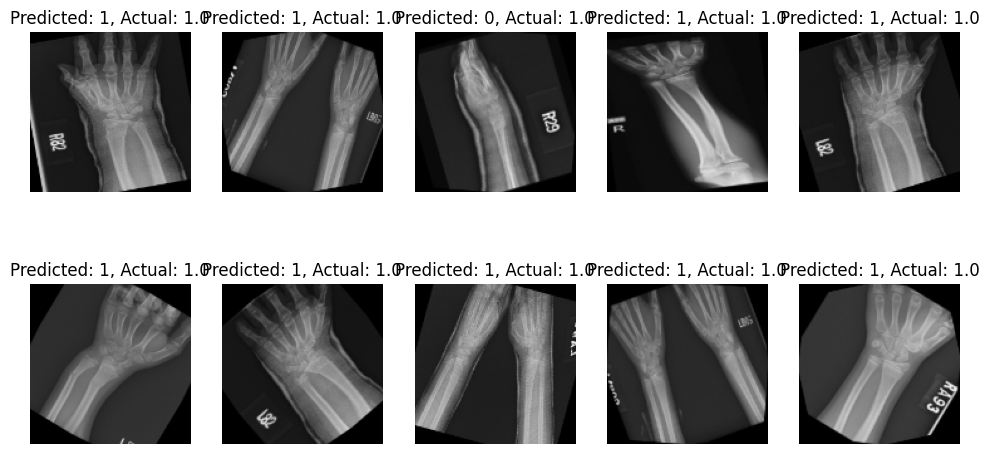

In [ ]:
import numpy as np

def predict_and_visualize(model, x_test, y_test_labels):
    # Realizar predicciones en el conjunto de prueba
    predictions = model.predict(x_test)

    # Obtener las etiquetas predichas
    predicted_labels = np.argmax(predictions, axis=1)

    # Mostrar las primeras 10 imágenes con predicciones y etiquetas reales
    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i])

        # Dividir la línea para mayor legibilidad
        prediction_text = f'Predicted: {predicted_labels[i]}'
        actual_text = f'Actual: {y_test_labels[i]}'

        plt.title(f'{prediction_text}, {actual_text}')
        plt.axis('off')
    plt.show()


# Usar la función con el modelo entrenado, imágenes de prueba y etiquetas reales
predict_and_visualize(model, x_test, y_test_labels)
